In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Gerar dados fictícios
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers + 1),
    'age': np.random.randint(18, 70, n_customers),
    'tenure_months': np.random.randint(1, 60, n_customers),
    'total_purchases': np.random.randint(1, 100, n_customers),
    'avg_order_value': np.random.uniform(50, 500, n_customers),
    'last_purchase_days_ago': np.random.randint(1, 365, n_customers),
    'total_spend': np.random.uniform(100, 10000, n_customers),
    'num_support_requests': np.random.randint(0, 10, n_customers)
}

df = pd.DataFrame(data)

# Criar variável de churn (exemplo: clientes com compra há mais de 90 dias e gastos abaixo da média)
df['churn'] = ((df['last_purchase_days_ago'] > 90) & (df['total_spend'] < df['total_spend'].mean())).astype(int)


## Anaise exploratoria

   customer_id  age  tenure_months  total_purchases  avg_order_value  \
0            1   56             35               17       474.041925   
1            2   69             51               95       402.729205   
2            3   46             15               98       209.678612   
3            4   32             25               60       235.458919   
4            5   60             55               64       297.327220   

   last_purchase_days_ago  total_spend  num_support_requests  churn  
0                     247  1764.369471                     0      1  
1                       8  4802.014556                     1      0  
2                     141   646.702955                     8      1  
3                     362  9429.596195                     1      0  
4                       8   840.729931                     2      0  

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      

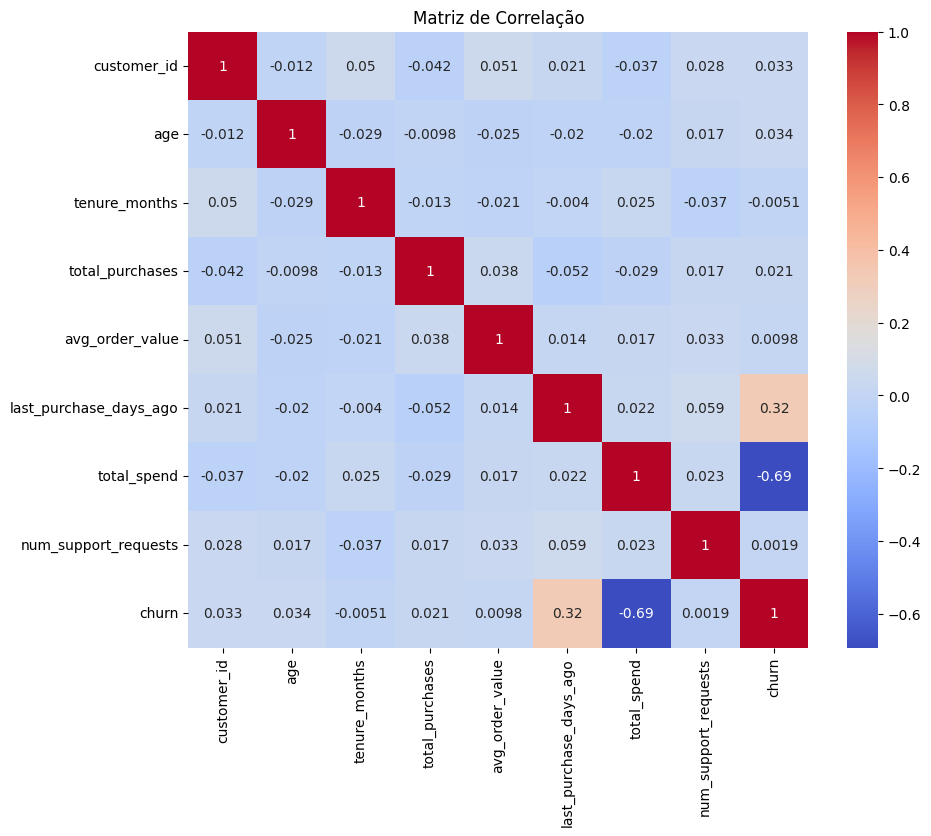

In [4]:
print(df.head())
print("\nInformações do Dataset:")
print(df.info())
print("\nEstatísticas Descritivas:")
print(df.describe())
print("\nTaxa de Churn:")
print(df['churn'].value_counts(normalize=True))

# Visualização da correlação entre variáveis
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


## Preparação e treinamento do modelo


Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Matriz de Confusão:
[[118   0]
 [  0  82]]


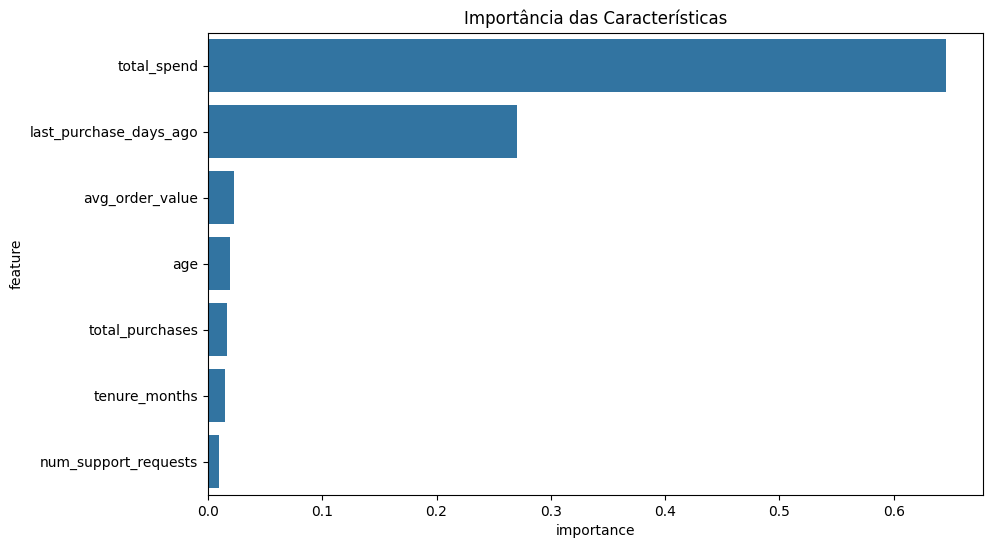

In [5]:
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treinamento do modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Avaliação do modelo
y_pred = rf_model.predict(X_test_scaled)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Importância das características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importância das Características')
plt.show()

## Previsão para novos clientes

In [6]:
new_customers = pd.DataFrame({
    'age': [35, 55],
    'tenure_months': [12, 36],
    'total_purchases': [20, 80],
    'avg_order_value': [150, 300],
    'last_purchase_days_ago': [30, 120],
    'total_spend': [3000, 8000],
    'num_support_requests': [2, 5]
})

new_customers_scaled = scaler.transform(new_customers)
new_predictions = rf_model.predict(new_customers_scaled)
new_probabilities = rf_model.predict_proba(new_customers_scaled)[:, 1]

print("\nPrevisões para Novos Clientes:")
for i, (pred, prob) in enumerate(zip(new_predictions, new_probabilities)):
    print(f"Cliente {i+1}: Churn Previsto: {pred}, Probabilidade de Churn: {prob:.2f}")


Previsões para Novos Clientes:
Cliente 1: Churn Previsto: 0, Probabilidade de Churn: 0.03
Cliente 2: Churn Previsto: 0, Probabilidade de Churn: 0.01
